# Applied Data Science Capstone Project - Battle of the Neighbourhoods

## Introduction/Business Problem

In this project, I plan to identify the ideal area to open a Malaysian restaurant in San Diego, California. I have decided on this problem because despite the number of Malaysians who live in San Diego, there has not been a Malaysian restaurant opened in the area. I believe that opening one would be a good idea, and this project will identify where in San Diego would be best.

## Data

In order to find the ideal area to open up the Malaysian restaurant, I first looked up some of the most popular Malaysian/Southeast Asian restaurants in the United States. The restaurants chosen were **Kopitiam** in New York City, **Lukshon** in Culver City, California, **Kedai Makan** in Seattle, Washington, and **Pok Pok** in Portland, Oregon. Analyzing the neighbourhoods/areas that these already successful restaurants are located in helped decide which area in San Diego was most similar to those.

This project utilized the **Foursquare** API to explore venues in the specified areas. It was used to analyze the neighbourhoods of the already successful restaurants, as well as explore the cities in the San Diego county to find the city that is most similar.

In [ ]:
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if folium not installed
import folium # map rendering library

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # k-means clustering

Solving environment: - 

In [58]:
# The code was removed by Watson Studio for sharing.

We first get the locations and other relevant information of the restaurants that we want to analyze.

In [4]:
ca_address = 'Culver City, CA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(ca_address)
ca_latitude = location.latitude
ca_longitude = location.longitude
print('California Latitude and Longitude: ' + str(ca_latitude), str(ca_longitude))

California Latitude and Longitude: 34.0211224 -118.3964665


In [5]:
ny_address = 'New York City, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(ny_address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print('New York Latitude and Longitude: ' + str(ny_latitude), str(ny_longitude))

New York Latitude and Longitude: 40.7127281 -74.0060152


In [6]:
wa_address = 'Seattle, WA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(wa_address)
wa_latitude = location.latitude
wa_longitude = location.longitude
print('Washington Latitude and Longitude: ' + str(wa_latitude), str(wa_longitude))

Washington Latitude and Longitude: 47.6038321 -122.3300624


In [7]:
or_address = 'Portland, OR'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(or_address)
or_latitude = location.latitude
or_longitude = location.longitude
print('Portland Latitude and Longitude: ' + str(or_latitude), str(or_longitude))

Portland Latitude and Longitude: 45.5202471 -122.6741949


In [8]:
ca_search_query = 'Lukshon'
ny_search_query = 'Kopitiam'
wa_search_query = 'Kedai Makan'
or_search_query = 'Pok Pok'
# print(search_query + ' .... OK!')

In [9]:
ca_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ca_latitude, ca_longitude, VERSION, ca_search_query, LIMIT)
ny_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ny_latitude, ny_longitude, VERSION, ny_search_query, LIMIT)
wa_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, wa_latitude, wa_longitude, VERSION, wa_search_query, LIMIT)
or_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, or_latitude, or_longitude, VERSION, or_search_query, LIMIT)

In [10]:
ca_results = requests.get(ca_url).json()
ny_results = requests.get(ny_url).json()
wa_results = requests.get(wa_url).json()
or_results = requests.get(or_url).json()
or_results

{'meta': {'code': 200, 'requestId': '5d92ed83f96b2c0038cae86f'},
 'response': {'venues': [{'id': '58f952f3e96d0c3bd1899bc5',
    'name': 'Pok Pok NW',
    'location': {'address': '1639 NW Marshall St',
     'lat': 45.530779335747035,
     'lng': -122.68817332275336,
     'labeledLatLngs': [{'label': 'display',
       'lat': 45.530779335747035,
       'lng': -122.68817332275336}],
     'distance': 1600,
     'postalCode': '97209',
     'cc': 'US',
     'city': 'Portland',
     'state': 'OR',
     'country': 'United States',
     'formattedAddress': ['1639 NW Marshall St',
      'Portland, OR 97209',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d149941735',
      'name': 'Thai Restaurant',
      'pluralName': 'Thai Restaurants',
      'shortName': 'Thai',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1569910147',
    'hasPerk': False}]}}

We can now see the locations of the four restaurants. We can also plot a circle showing the 2000m radius around the restaurant where we will be analyzing.

In [59]:
ca_map = folium.Map(location = [ca_latitude, ca_longitude], zoom_start=14)
folium.Marker([ca_latitude, ca_longitude]).add_to(ca_map)
folium.Circle([ca_latitude, ca_longitude], radius = 2000).add_to(ca_map)
ca_map

In [60]:
ny_map = folium.Map(location = [ny_latitude, ny_longitude], zoom_start=14)
folium.Marker([ny_latitude, ny_longitude]).add_to(ny_map)
folium.Circle([ny_latitude, ny_longitude], radius = 2000).add_to(ny_map)
ny_map

In [61]:
wa_map = folium.Map(location = [wa_latitude, wa_longitude], zoom_start=14)
folium.Marker([wa_latitude, wa_longitude]).add_to(wa_map)
folium.Circle([wa_latitude, wa_longitude], radius = 2000).add_to(wa_map)
wa_map

In [62]:
or_map = folium.Map(location = [or_latitude, or_longitude], zoom_start=14)
folium.Marker([or_latitude, or_longitude]).add_to(or_map)
folium.Circle([or_latitude, or_longitude], radius = 2000).add_to(or_map)
or_map

Now we take the relevant information from the 4 areas and transform them into their respective dataframes.

In [17]:
# assign relevant part of JSON to venues
ca_venues = ca_results['response']['venues']
ny_venues = ny_results['response']['venues']
wa_venues = wa_results['response']['venues']
or_venues = or_results['response']['venues']

# tranform venues into a dataframe
ca_dataframe = json_normalize(ca_venues)
ny_dataframe = json_normalize(ny_venues)
wa_dataframe = json_normalize(wa_venues)
or_dataframe = json_normalize(or_venues)

In [21]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in ca_dataframe.columns if col.startswith('location.')] + ['id']
ca_df = ca_dataframe.loc[:, filtered_columns]
ny_df = ny_dataframe.loc[:, filtered_columns]
wa_df = wa_dataframe.loc[:, filtered_columns]
or_df = or_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
ca_df['categories'] = ca_df.apply(get_category_type, axis=1)
ny_df['categories'] = ny_df.apply(get_category_type, axis=1)
wa_df['categories'] = wa_df.apply(get_category_type, axis=1)
or_df['categories'] = or_df.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ca_df.columns = [column.split('.')[-1] for column in ca_df.columns]
ny_df.columns = [column.split('.')[-1] for column in ny_df.columns]
wa_df.columns = [column.split('.')[-1] for column in wa_df.columns]
or_df.columns = [column.split('.')[-1] for column in or_df.columns]

# an example of one of the dataframes created
ny_df

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Kopitiam,Malay Restaurant,151 E Broadway,US,New York,United States,btw Rutgers & Pike St,1285,"[151 E Broadway (btw Rutgers & Pike St), New Y...","[{'label': 'display', 'lat': 40.71397394589247...",40.713974,-73.990868,10002,NY,5b33b3c74a7aae002cb0611d


Here, we now want to analyze the venues around each of the restaurants. This is done with calls to the Foursquare API

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        if requests.get(url).json()["response"]['groups']:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
ca_venues = getNearbyVenues(names=ca_df['name'],
                                   latitudes=ca_df['lat'],
                                   longitudes=ca_df['lng']
                                  )
ca_venues.drop(['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude'], axis=1, inplace=True)

ny_venues = getNearbyVenues(names=ny_df['name'],
                                   latitudes=ny_df['lat'],
                                   longitudes=ny_df['lng']
                                  )
ny_venues.drop(['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude'], axis=1, inplace=True)

wa_venues = getNearbyVenues(names=wa_df['name'],
                                   latitudes=wa_df['lat'],
                                   longitudes=wa_df['lng']
                                  )
wa_venues.drop(['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude'], axis=1, inplace=True)

or_venues = getNearbyVenues(names=or_df['name'],
                                   latitudes=or_df['lat'],
                                   longitudes=or_df['lng']
                                  )
or_venues.drop(['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude'], axis=1, inplace=True)

Here is an example of a few of the venues we are analyzing.

In [25]:
ca_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lukshon,34.029960,-118.384247,Asian Restaurant
1,Room & Board,34.030223,-118.384531,Furniture / Home Store
2,Arcana: Books on the Arts,34.030146,-118.383500,Bookstore
3,The COOLHAUS Shop,34.030329,-118.381487,Ice Cream Shop
4,H.D. Buttercup L.P.,34.030752,-118.385067,Furniture / Home Store


We can now plot the locations of the different venues on their respective maps to see how they are laid out.

In [28]:
ca_venue_map = folium.Map(location=[ca_latitude, ca_longitude], zoom_start=14)

# add markers to map
for lat, lng, venue in zip(ca_venues['Venue Latitude'], ca_venues['Venue Longitude'], ca_venues['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ca_venue_map)  
    
ca_venue_map

In [29]:
ny_venue_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=14)

# add markers to map
for lat, lng, venue in zip(ny_venues['Venue Latitude'], ny_venues['Venue Longitude'], ny_venues['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ny_venue_map)  
    
ny_venue_map

In [30]:
wa_venue_map = folium.Map(location=[wa_latitude, wa_longitude], zoom_start=14)

# add markers to map
for lat, lng, venue in zip(wa_venues['Venue Latitude'], wa_venues['Venue Longitude'], wa_venues['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(wa_venue_map)  
    
wa_venue_map

In [31]:
or_venue_map = folium.Map(location=[or_latitude, or_longitude], zoom_start=14)

# add markers to map
for lat, lng, venue in zip(or_venues['Venue Latitude'], or_venues['Venue Longitude'], or_venues['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(or_venue_map)  
    
or_venue_map

## Methodology

Now that we have most of the data that we need, we can start analyzing the neighbourhoods. We will still need to gather data on the neighbourhoods/cities in San Diego, but we will handle that a little later.

We have the data on the venues around some of the most popular/highly rated Malaysian/Southeast Asian restaurants in the United States. We looked at venues within a 2000 meter radius, because that is the radius that we will be using when analyzing the cities of San Diego as well, to reduce overlap of the cities.

Now, using the data that we have collected, we will analyze the different categories of venues that are around the restaurants. Once we have found the different frequencies of the categories for each location, we will take the average of that to come up with our *"comparison guideline"*. We will be using this to compare with the cities in San Diego, finding the city which is most similar to this guideline. In this project, we define *most similar* simply as the city whose frequencies of categories of venues differ the least.

Then, once we have completed the analysis of the cities of San Diego, we will perform **k-means clustering** to cluster the cities of San Diego. We perform this clustering to find the cities that are similar to the one that we found to be the closest to our comparison guideline, giving us a few options for cities to open our restaurant in.

## Analysis

Here, we will perform **one hot encoding** to analyze the frequencies of venue categories for the different locations.

In [32]:
# one hot encoding
ca_onehot = pd.get_dummies(ca_venues[['Venue Category']], prefix="", prefix_sep="")
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")
wa_onehot = pd.get_dummies(wa_venues[['Venue Category']], prefix="", prefix_sep="")
or_onehot = pd.get_dummies(or_venues[['Venue Category']], prefix="", prefix_sep="")

ca_onehot = ca_onehot.mean().reset_index().transpose()
new_header = ca_onehot.iloc[0]
ca_onehot = ca_onehot[1:]
ca_onehot.columns = new_header

ny_onehot = ny_onehot.mean().reset_index().transpose()
new_header = ny_onehot.iloc[0]
ny_onehot = ny_onehot[1:]
ny_onehot.columns = new_header

wa_onehot = wa_onehot.mean().reset_index().transpose()
new_header = wa_onehot.iloc[0]
wa_onehot = wa_onehot[1:]
wa_onehot.columns = new_header

or_onehot = or_onehot.mean().reset_index().transpose()
new_header = or_onehot.iloc[0]
or_onehot = or_onehot[1:]
or_onehot.columns = new_header

# convert NaN values to 0
all_grouped = pd.concat([ca_onehot,ny_onehot,wa_onehot,or_onehot], sort=False, ignore_index=True)
all_grouped.fillna(0, inplace=True)

# initialize states column values
states = ['California', 'New York', 'Washington', 'Oregon']

# add states column and rearrange to have it as first column
all_grouped['State'] = states
fixed_columns = [all_grouped.columns[-1]] + list(all_grouped.columns[:-1])
all_grouped = all_grouped[fixed_columns]

# add row for average values from all states
all_grouped.loc[4] = ['Grouped'] + list(all_grouped.loc[:, all_grouped.columns != 'State'].mean())

all_grouped

,State,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bookstore,...,Korean Restaurant,Marijuana Dispensary,Modern European Restaurant,Optical Shop,Peruvian Restaurant,Poke Place,Soccer Stadium,Tapas Restaurant,Tea Room,Whisky Bar
0,California,0.02,0.0100,0.030,0.0100,0.0100,0.0100,0.01,0.0100,0.0200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,New York,0.00,0.0000,0.020,0.0200,0.0000,0.0000,0.02,0.0100,0.0100,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Washington,0.01,0.0000,0.010,0.0000,0.0000,0.0000,0.03,0.0300,0.0200,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Oregon,0.01,0.0000,0.000,0.0000,0.0000,0.0000,0.02,0.0000,0.0400,...,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100
4,Grouped,0.01,0.0025,0.015,0.0075,0.0025,0.0025,0.02,0.0125,0.0225,...,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025


We can now see the 10 most frequent venues in each location, as well as the average (under the *Grouped* header).

In [33]:
num_top_venues = 10

for state in all_grouped['State']:
    print("----"+state+"----")
    temp = all_grouped[all_grouped['State'] == state].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----California----
                     venue  freq
0              Coffee Shop  0.06
1       Mexican Restaurant  0.04
2  New American Restaurant  0.04
3              Pizza Place  0.04
4              Art Gallery  0.03
5                Gastropub  0.03
6   Furniture / Home Store  0.03
7      American Restaurant  0.02
8       Italian Restaurant  0.02
9           Ice Cream Shop  0.02


----New York----
                           venue  freq
0                    Coffee Shop  0.04
1                           Café  0.04
2                Thai Restaurant  0.03
3                    Pizza Place  0.03
4                          Hotel  0.02
5                      Juice Bar  0.02
6       Mediterranean Restaurant  0.02
7  Paper / Office Supplies Store  0.02
8                           Park  0.02
9                 Ice Cream Shop  0.02


----Washington----
            venue  freq
0     Coffee Shop  0.14
1  Ice Cream Shop  0.04
2    Cocktail Bar  0.04
3  Sandwich Place  0.04
4     Yoga Studio  0.03
5    

Now that we have analyzed the data from the different locations, we focus our attention on San Diego County, where we plan on opening our restaurant.

In [129]:
# list of the cities in San Diego county
sd_cities = ['San Diego', 'Carlsbad','Chula Vista','Coronado','Del Mar','El Cajon','Encinitas','Escondido','Imperial Beach','Kearny Mesa','La Mesa','Lemon Grove','La Jolla','National City','Oceanside','Poway','San Marcos','Santee','Solana Beach','Vista']

In [88]:
latitudes = []
longitudes = []

for city in sd_cities:
    address = '{}, CA'.format(city)

    geolocator = Nominatim(user_agent="project_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    latitudes.append(latitude)
    longitudes.append(longitude)

In [89]:
sd_columns = ['Neighbourhood', 'Latitude', 'Longitude']
sd_df = pd.DataFrame(columns=sd_columns)

sd_df['Neighbourhood'] = sd_cities
sd_df['Latitude'] = latitudes
sd_df['Longitude'] = longitudes

sd_df

,Neighbourhood,Latitude,Longitude
0,San Diego,32.717421,-117.162771
1,Carlsbad,33.158093,-117.350597
2,Chula Vista,32.640054,-117.084196
3,Coronado,32.691520,-117.176695
4,Del Mar,32.959489,-117.265315
5,El Cajon,32.794773,-116.962527
6,Encinitas,33.036987,-117.291982
7,Escondido,33.121675,-117.081485
8,Imperial Beach,32.583944,-117.113085
9,Kearny Mesa,32.828924,-117.142415


We can plot the map of San Diego county with markers showing the centers of each city, as well as a circle around each city to show the areas we will be looking at.

In [90]:
sd_latitude = sd_df['Latitude'].mean()
sd_longitude = sd_df['Longitude'].mean()
sd_map = folium.Map(location=[sd_latitude, sd_longitude], zoom_start = 10)

# add markers to map
for lat, lng, city in zip(sd_df['Latitude'], sd_df['Longitude'], sd_df['Neighbourhood']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.Circle([lat, lng], radius=2000).add_to(sd_map)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sd_map) 

sd_map

Now, we get the venues in those areas we plotted.

In [91]:
sd_venues = getNearbyVenues(names=sd_df['Neighbourhood'],
                                   latitudes=sd_df['Latitude'],
                                   longitudes=sd_df['Longitude'],
                           )

In [130]:
sd_venues.drop_duplicates('Venue', keep='first', inplace=True)
sd_venues.shape

(1443, 7)

Because there are so many venues, it will be easier to look at their distribution using a heat map.

In [93]:
from folium import plugins
from folium.plugins import HeatMap

venue_latlons = [[res[4], res[5]] for res in sd_venues.values]

sd_venue_map = folium.Map(location=[sd_latitude, sd_longitude], zoom_start=10)

HeatMap(venue_latlons).add_to(sd_venue_map)

for lat, lng, city in zip(sd_df['Latitude'], sd_df['Longitude'], sd_df['Neighbourhood']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat,lng], popup=label).add_to(sd_venue_map)
sd_venue_map

We perform the same one hot encoding and analysis of the venues in San Diego.

In [95]:
# one hot encoding
sd_onehot = pd.get_dummies(sd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sd_onehot['Neighbourhood'] = sd_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sd_onehot.columns[-1]] + list(sd_onehot.columns[:-1])
sd_onehot = sd_onehot[fixed_columns]

sd_onehot.head()

,Neighbourhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,San Diego,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,San Diego,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Diego,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,San Diego,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,San Diego,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
sd_grouped = sd_onehot.groupby('Neighbourhood', sort=False).mean().reset_index()

In [97]:
sd_grouped.head()

,Neighbourhood,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,San Diego,0.0,0.000000,0.040000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.01,0.020000,0.00000,0.000000,0.000000
1,Carlsbad,0.0,0.000000,0.044444,0.0,0.000000,0.0,0.0,0.011111,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.022222,0.00000,0.000000,0.011111
2,Chula Vista,0.0,0.000000,0.022472,0.0,0.011236,0.0,0.0,0.000000,0.0,...,0.0,0.011236,0.011236,0.022472,0.011236,0.00,0.000000,0.00000,0.011236,0.000000
3,Coronado,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.010870,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.010870,0.01087,0.000000,0.000000
4,Del Mar,0.0,0.015385,0.076923,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.015385,0.00000,0.000000,0.000000


In [98]:
num_top_venues = 10

for hood in sd_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = sd_grouped[sd_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----San Diego----
                 venue  freq
0                Hotel  0.08
1   Italian Restaurant  0.07
2   Mexican Restaurant  0.06
3                 Café  0.05
4                  Bar  0.05
5  American Restaurant  0.04
6           Steakhouse  0.03
7          Coffee Shop  0.03
8   Seafood Restaurant  0.03
9         Burger Joint  0.03


----Carlsbad----
                 venue  freq
0                Beach  0.10
1                 Café  0.07
2                  Bar  0.06
3   Mexican Restaurant  0.06
4  American Restaurant  0.04
5       Breakfast Spot  0.04
6                Hotel  0.04
7          Pizza Place  0.04
8            Juice Bar  0.03
9   Italian Restaurant  0.03


----Chula Vista----
                 venue  freq
0   Mexican Restaurant  0.07
1        Grocery Store  0.06
2          Pizza Place  0.03
3                Hotel  0.03
4       Sandwich Place  0.03
5   Seafood Restaurant  0.03
6           Taco Place  0.03
7       Lingerie Store  0.02
8  American Restaurant  0.02
9       Break

To find the city closest in venue frequency to our comparison guideline, we calculate the differences in frequencies.

In [144]:
all_grouped.loc[4]['American Restaurant']

0.01

In [148]:
diffs = []

for i in range(len(sd_grouped)):
    diff = 0
    for column in all_grouped.columns[1:]:
        
        try:
            diff = diff + abs(sd_grouped.loc[i][column]-all_grouped.iloc[4][column])
        except KeyError:
            diff = diff + all_grouped.iloc[4][column]
    
    diffs.append(diff)

In [149]:
print('Suggested city to open Malaysian restaurant in: ', sd_grouped.iloc[diffs.index(min(diffs))][0])

Suggested city to open Malaysian restaurant in:  Coronado


So now we see that according to our analysis, the city where we should open the Malaysian restaurant is **Coronado**!

We can plot a bar chart to see how close all the cities were to our comparison.

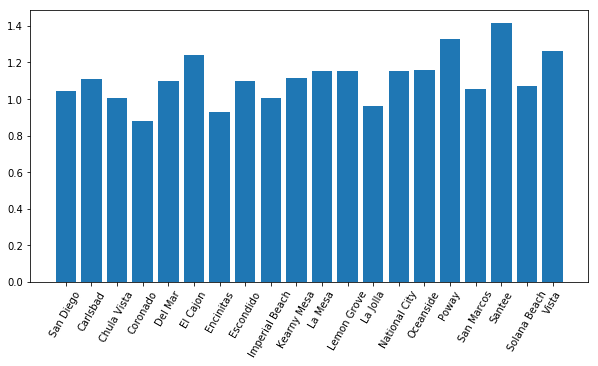

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(sd_cities, diffs, align='center',linewidth=1)
plt.xticks(rotation=60)

plt.show()

Let's take a closer look at Coronado.

In [134]:
coronado_venues = sd_venues[sd_venues['Neighbourhood'] == 'Coronado']
coronado_venues.reset_index(drop=True, inplace=True)
coronado_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Coronado,32.69152,-117.176695,Coronado Island,32.691872,-117.173862,Island
1,Coronado,32.69152,-117.176695,Spreckels Park,32.690644,-117.176423,Park
2,Coronado,32.69152,-117.176695,Burger Lounge Coronado,32.686971,-117.179442,Burger Joint
3,Coronado,32.69152,-117.176695,Which Wich? Superior Sandwiches,32.686928,-117.179491,Sandwich Place
4,Coronado,32.69152,-117.176695,Claytons Coffee Shop,32.685945,-117.179659,Diner


In [133]:
center = [coronado_venues['Neighbourhood Latitude'].iloc[0], coronado_venues['Neighbourhood Longitude'].iloc[0]]
coronado_venue_map = folium.Map(location=center, zoom_start=14)

# add markers to map
for lat, lng, venue in zip(coronado_venues['Venue Latitude'], coronado_venues['Venue Longitude'], coronado_venues['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.Circle(location=center, radius=2000).add_to(coronado_venue_map)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(coronado_venue_map)  
    
coronado_venue_map

Now let's use **k-means clustering** to find the other cities in San Diego that would be in the same cluster as Coronado.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sd_venues_sorted = pd.DataFrame(columns=columns)
sd_venues_sorted['Neighbourhood'] = sd_grouped['Neighbourhood']

for ind in np.arange(sd_grouped.shape[0]):
    sd_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sd_grouped.iloc[ind, :], num_top_venues)

In [118]:
# set number of clusters
kclusters = 5

sd_grouped_clustering = sd_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 3, 1, 1, 3, 4, 3, 2, 2, 1, 0, 2, 3, 1, 3, 2, 1, 1, 3, 2],
      dtype=int32)

In [119]:
# add clustering labels
sd_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sd_merged = sd_df

# merge sd_grouped with toronto_data to add latitude/longitude for each neighborhood
sd_merged = sd_merged.join(sd_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

sd_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Diego,32.717421,-117.162771,2,Hotel,Italian Restaurant,Mexican Restaurant,Bar,Café,American Restaurant,Burger Joint,Coffee Shop,Steakhouse,Pizza Place
1,Carlsbad,33.158093,-117.350597,3,Beach,Café,Bar,Mexican Restaurant,Breakfast Spot,American Restaurant,Pizza Place,Hotel,Grocery Store,Juice Bar
2,Chula Vista,32.640054,-117.084196,1,Mexican Restaurant,Grocery Store,Seafood Restaurant,Sandwich Place,Taco Place,Hotel,Pizza Place,Burger Joint,Pharmacy,Brewery
3,Coronado,32.691520,-117.176695,1,Park,Seafood Restaurant,Hotel,Ice Cream Shop,Mexican Restaurant,Burger Joint,Pizza Place,Surf Spot,Italian Restaurant,Resort
4,Del Mar,32.959489,-117.265315,3,American Restaurant,Beach,Restaurant,Seafood Restaurant,Racetrack,Theme Park Ride / Attraction,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Surf Spot


In [110]:
import matplotlib.cm as cm
import matplotlib.colors as colors

We plot the cities, now with different colored markers to distinguish between the clusters.

In [153]:
# create map
map_clusters = folium.Map(location=[sd_latitude, sd_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sd_merged['Latitude'], sd_merged['Longitude'], sd_merged['Neighbourhood'], sd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

From the clustering, we see that Coronado was given the cluster label 1, so let's take a look at all the cities in that cluster.

In [155]:
sd_merged.loc[sd_merged['Cluster Labels'] == 1, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]].reset_index(drop=True)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chula Vista,Mexican Restaurant,Grocery Store,Seafood Restaurant,Sandwich Place,Taco Place,Hotel,Pizza Place,Burger Joint,Pharmacy,Brewery
1,Coronado,Park,Seafood Restaurant,Hotel,Ice Cream Shop,Mexican Restaurant,Burger Joint,Pizza Place,Surf Spot,Italian Restaurant,Resort
2,Kearny Mesa,Japanese Restaurant,Sushi Restaurant,Bubble Tea Shop,Korean Restaurant,Mexican Restaurant,Sandwich Place,Vietnamese Restaurant,Chinese Restaurant,Noodle House,Ramen Restaurant
3,National City,Mexican Restaurant,Chinese Restaurant,Filipino Restaurant,Pizza Place,Park,Bakery,Sushi Restaurant,Auto Dealership,Tea Room,Pub
4,San Marcos,Mexican Restaurant,Pizza Place,Sushi Restaurant,Brewery,Baseball Field,Deli / Bodega,Gym / Fitness Center,Park,Diner,Hotel
5,Santee,Mexican Restaurant,Brewery,Breakfast Spot,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Shoe Store,Deli / Bodega,Gymnastics Gym,American Restaurant


Our analysis is now complete. We have identified Coronado as the city in San Diego which is "closest" to an aggregate of the locations of popular Malaysian/Southeast Asian restaurants in the United States. From this information, we were able to use k-means clustering to find the other cities that are clustered with Coronado, which has given us a list of 6 possible cities to open our Malaysian restaurant.

## Results and Discussion

It's interesting to see that the cities in this cluster tend to have a lot of different restaurant categories as their most common venues. Taking a closer look, we can also see that a good amount of the restaurants are Asian restaurants, similar to Malaysian restaurants. Even more interestingly, this is more apparent in **Kearny Mesa**, where all of its top 10 most common venues are food or drink venues, with 8 out of 10 of them being Asian themed venues.

This raises an interesting discussion to go into deeper analysis to find which out of the 6 cities would be the most ideal location. Perhaps it would be impossible to determine the answer to that question without gathering other data, such as the ratings and popularities of other venues and restaurants in those areas, the demographic in those areas as well as their general preferences in food. Maybe some areas are closer to university campuses with international students, which would make it more appealing for them to travel to the restaurant. Also, would it be best to open the restaurant in an area that is already saturated with restaurants - specifically Asian restaurants - or one that is more sparse of restaurants. No matter what the actual ideal location is, our analysis of the data available to us has given us great insights, and has already given us some very good choices of location. 

## Conclusion

Our aim of this project was the find the ideal location to open a Malaysian restaurant in San Diego. We did this by first looking at some already popular and highly rated Malaysian restaurants in other parts of the United States, and analyzed the locations that they are in. We used this data to then compare it to cities in San Diego to find the ideal locations, in the end giving us 6 possible cities: **Chula Vista, Coronado, Kearny Mesa, National City, San Marcos, and Santee**. These cities were determined by finding the city that was closest to an aggregate of the locations of the already established restaurants, which we found to be Coronado, and then performing clustering to find the other cities that are similar to Coronado.

This study has been insightful, giving good choices for potential locations. In order to narrow down our selection to one ideal city/location would require additional data such as the demographic data, success of restaurants and other venues in those locations, preferences of people who frequent the locations, etc.